In [2]:
import numpy as np 

x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
from scipy import sparse

# create a 2d numpy array with a diagonal of ones, and zeroes everywhere else
eye = np.eye(4)
print("Numpy array:\n%s" % eye)

# convert the numpy array to a scipy sparse matrix in CSR format
# only the non-zero entries are stored

sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy sparse CSR matrix:\n%s" % sparse_matrix)

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


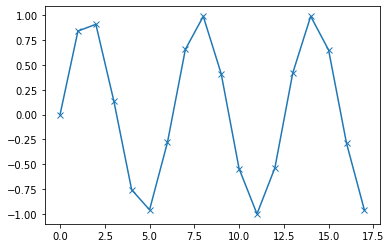

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Generate a sequence of integers
x = np.arange(18)
# Create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker = "x")

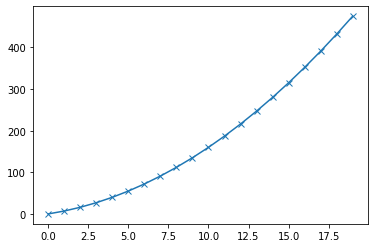

In [6]:
x2 = np.arange(20)

y2 = x2 * (x2 + 6)
#y2 = np.arange(20)

plt.plot(x2, y2, marker = "x")


In [7]:
import pandas as pd 

# Create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location': ["New York", "Paris", "Berlin", "London"],
        'Age': [24, 13, 53, 33]
        }

data_pandas = pd.DataFrame(data)
data_pandas


,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

# The iris object that is returned is a Bunch object, similar to a dictionary

iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris['data'].shape


(150, 4)

In [12]:
# this is a comment in python
iris['data'][:5]
# should display the first five rows

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
type(iris['target'])


numpy.ndarray

In [14]:
# Page 24
iris['target'].shape

(150,)

In [15]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
# Page 25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)


In [18]:
X_train.shape

(112, 4)

In [19]:
X_test.shape

(38, 4)

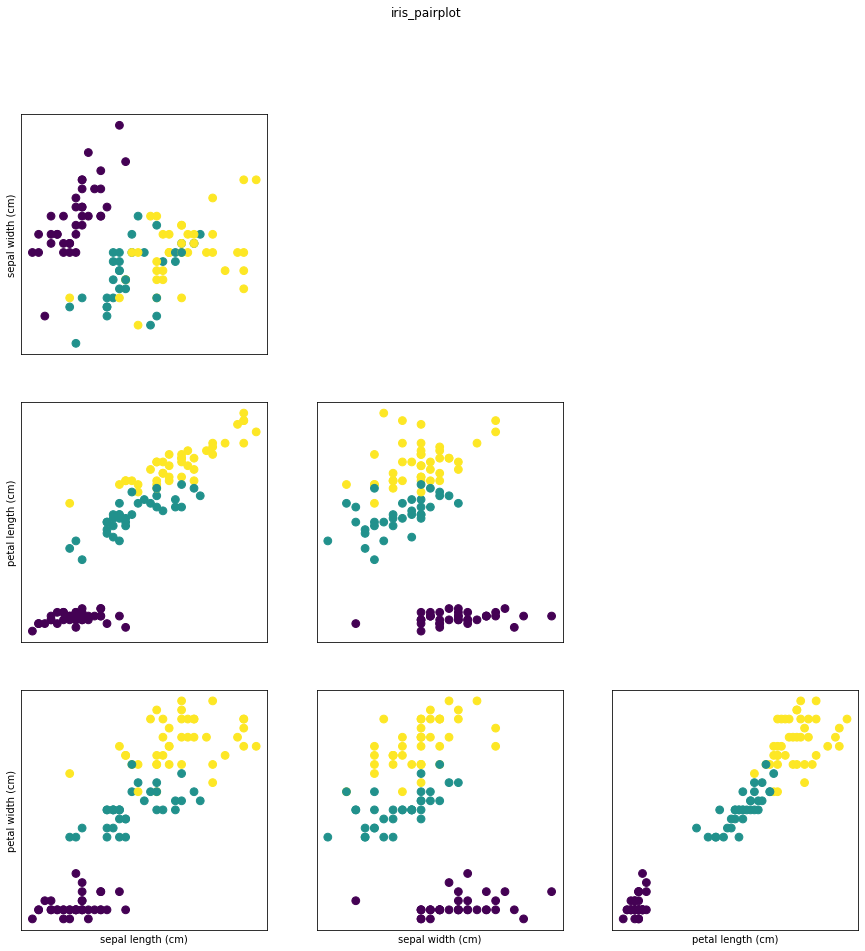

In [20]:
# Page 26
fig, ax = plt.subplots(3, 3, figsize=(15,15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

In [34]:
# Page 28 - kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [37]:
prediction = knn.predict(X_new)
prediction

array([0])

In [38]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [39]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158